# Datasets
We are going to work on two datasets.

1. Iris dataset.
2. KNMI dataset (Weather data from Netherlands).

[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a dataset that describes flowers and their attributes, and it is used a lot in the data science and machine learning.
We can get it from one of these two sources:
1. from scikit-learn.
2. download it from [iris website](https://archive.ics.uci.edu/ml/datasets/iris)

[KNMI dataset](https://www.knmi.nl/climatology/daily_data/download.html). a daily measure of weather info from plants across Netherlands.

===========================================================================================================

# Descriptive Statistics with Numpy
`numpy` provides the basic of descriptive statistics.  
Although `pandas` has statistical functions, but they are from `numpy`.  
In this tutorial we will work mainly on numpy.

### Load iris from csv:
We are going to work out of CSV file.

In [20]:
import pandas as pd
iris = pd.read_csv('data/iris.data.csv', header=None, 
    names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species'])

In [21]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Get Numpy arrays from Pandas's dataframe:

In [22]:
# if pandas version >= 0.24 you can use .to_numpy()
sepal_widths = iris['sepal width (cm)'].values
petal_widths = iris['petal width (cm)'].values
petal_lengths = iris['petal length (cm)'].values
sepal_lengths = iris['sepal length (cm)'].values

## Basic Descriptive Statistics:

In [23]:
import numpy as np
print ('The max of sepal length: ', sepal_lengths.max(), ' -- ', np.max(sepal_lengths))
print ('The min of sepal length: ', sepal_lengths.min(),  ' -- ', np.min(sepal_lengths))
print ('The mean of sepal length: ', sepal_lengths.mean(), ' -- ',  np.mean(sepal_lengths))
print ('The STD of sepal length: ', sepal_lengths.std(),  ' -- ', np.std(sepal_lengths))
print ('The variance of sepal length', sepal_lengths.var(),  ' -- ', np.var(sepal_lengths))

The max of sepal length:  7.9  --  7.9
The min of sepal length:  4.3  --  4.3
The mean of sepal length:  5.843333333333334  --  5.843333333333334
The STD of sepal length:  0.8253012917851409  --  0.8253012917851409
The variance of sepal length 0.6811222222222223  --  0.6811222222222223


### Median and Percentile:

In [24]:
from scipy.stats import scoreatpercentile
print ('The median of sepal length: ', np.median(sepal_lengths))
print ('Percentile or quartile 50%: ', scoreatpercentile(sepal_lengths, 50))
print ('Percentile or quartile 75%: ', scoreatpercentile(sepal_lengths, 75))

The median of sepal length:  5.8
Percentile or quartile 50%:  5.8
Percentile or quartile 75%:  6.4


## Pandas statistics:

`pandas` adds its own functionalities that are built on top of `numpy`.  

### Dataframe's describe:

In [25]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### more statistical functions:

mode : most frequent occuring value.  
skew: Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.  
kurt: Kurtosis (distribution shape).  

In [26]:
iris.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.334053
petal length (cm)   -0.274464
petal width (cm)    -0.104997
dtype: float64

In [28]:
iris.kurt()

sepal length (cm)   -0.552064
sepal width (cm)     0.290781
petal length (cm)   -1.401921
petal width (cm)    -1.339754
dtype: float64

**AND MORE AND MORE**  

scipy

[scipy statistical module](https://docs.scipy.org/doc/scipy/reference/stats.html)

### Dataframe's plot:

<IPython.core.display.Javascript object>


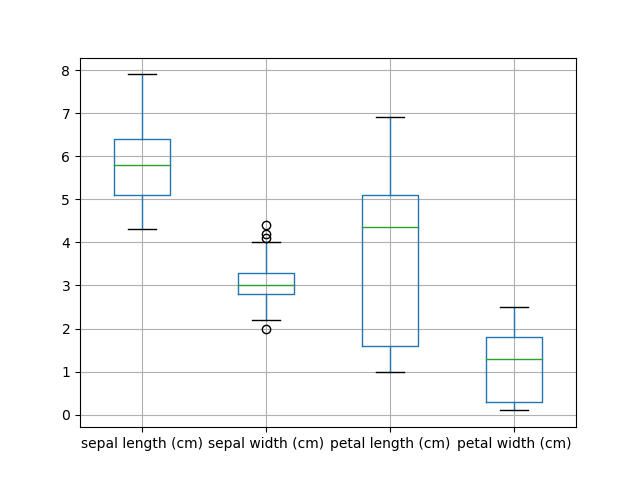

In [29]:
#ipython magic function
%matplotlib notebook
iris.boxplot(return_type='axes')

In [30]:
iris.quantile([0.1, 0.9])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


# Dealing with empty / invalid data:

many times the data that we got is not ideal, and we could find empty or invalid data.  
We are going to explore Netherlands weather data as example.  

Let us read weather data, and replace empty values with `nan`

In [31]:
to_float = lambda x: float(x.strip() or np.nan)
min_temp = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(12), unpack=True, 
                                converters={12: to_float}, 
                                                 skiprows=1) * .1

print ('min including nan: ', min_temp.min())
print ('max including nan: ', min_temp.max())

min including nan:  nan
max including nan:  nan


### exclude NaN in statistics:

* nanmin
* nanmax
* nanmean
* nanmedian
* ...

In [32]:
print ('excluding nan: ')
print ('min', np.nanmin(min_temp))
print ('max', np.nanmax(min_temp))
print ('mean', np.nanmean(min_temp))
print ('median', np.nanmedian(min_temp))

excluding nan: 
min -19.700000000000003
max 23.6
mean 6.627724838066767
median 6.800000000000001


## More robust approach to exclude invalid data: Masked Arrays:

nanmin is just a simpler and shorter approach to a more robust way to deal with invalid data.  
It is called `Masked Arrays`.  
It is part of sub-module `numpy.ma`.  

In [33]:
import numpy.ma as ma
inp = np.array([1,2,3,-100,5])
negative = lambda x: x < 0
print ('negative of the input array : ', negative(inp))
mask_inp= ma.array(inp, mask = negative(inp))
print ('mean of positive numbers: ', mask_inp.mean())

negative of the input array :  [False False False  True False]
mean of positive numbers:  2.75


### More features of masked arrays:  

1. By using masked arrays then we don't need to use nanmin, ....  
We can use min, max, mean, ...etc

In [34]:
import numpy.ma as ma

masked_min = ma.array(min_temp, mask = np.isnan(min_temp))
print ('min without using nanmin', masked_min.min())

min without using nanmin -19.700000000000003


2. we can get the valid only value:

In [35]:
print ('length all : ', len(masked_min))
print ('length of valid: ', len(masked_min.compressed()))

length all :  93272
length of valid:  64224


another way is to use: `masked_invalid`, which will include `NaN` and `Infinite`

In [37]:
maxs = ma.masked_invalid(min_temp)
maxs.min()

-19.700000000000003

### Pandas features to deal with invalid data:

Panda is `NaN` friendly.  
All its statistical functions are by default ignoring NaN.  

In [38]:
weather = pd.read_csv('data/KNMI.txt', header=0, usecols=(12,14), names=["min", "max"], converters={12: to_float, 14: to_float})
weather.head()

,min,max
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [95]:
weather['min'].min()

-197.0

Pandas has more features to deal with invalid data.  
A robust function `fillna`.

In [48]:
test_weather = weather.fillna(0)
test_weather.head()

,min,max
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Exercise: Check for global warming:


In [39]:
avg_temp, min_temp, max_temp = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(11, 12,14), unpack=True, 
                                converters={11: to_float, 12: to_float, 14: to_float}, 
                                                 encoding='latin1', skiprows=1) * .1

In [40]:
avg_temp = ma.array(avg_temp, mask = np.isnan(avg_temp))
min_temp = ma.array(min_temp, mask = np.isnan(min_temp))
max_temp = ma.array(avg_temp, mask = np.isnan(max_temp))

In [41]:
from datetime import datetime as dt
to_year = lambda x: dt.strptime(x, "%Y%m%d").year

years = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(1), unpack=True,
                  converters={1: to_year}, encoding='latin1', skiprows=1)

print ('first year: ', years.min(), ' and last year: ', years.max())

first year:  1951.0  and last year:  2019.0


and we will draw a graph of mean tempreture by year

In [42]:
year_range = range(int(years.min()), int(years.max()))

print ('range of years: ', year_range)
avg_of_avg_temp_by_year = [avg_temp[np.where (years == year)].mean() for year in year_range]


range of years:  range(1951, 2019)


#### alternative way of the above comprehension list: 

```python
avg_of_avg_temp_by_year=[]
for year in range(int(years[0]), int(years[-1]) -1):
    indices = np.where (years==year)
    avgs.append(avg_temp[indices].mean())
```

<IPython.core.display.Javascript object>


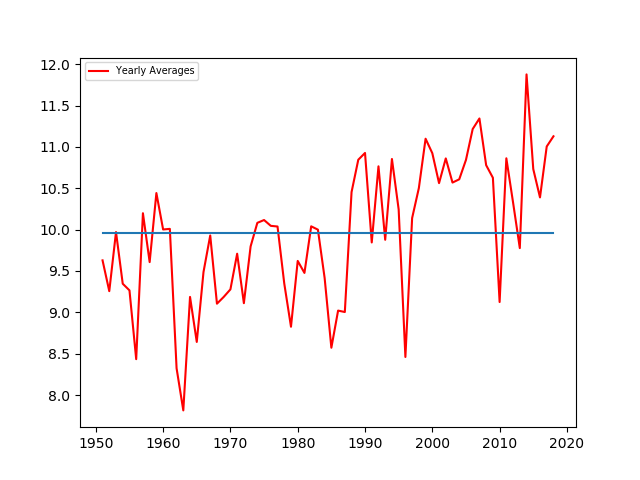

In [43]:
import matplotlib.pyplot as plt
plt.plot(year_range, avg_of_avg_temp_by_year, 'r-', label='Yearly Averages')
plt.plot(year_range, np.ones(len(avg_of_avg_temp_by_year)) * np.mean(avg_of_avg_temp_by_year))
plt.legend(prop={'size': 'x-small'})
plt.show()

# EDA: Beyond Basic Statistics
Descriptive statistics are the basic of more deeper and comprehensive analysis. It is the basic tool for the `EDA` **Exploratory Data Analysis**. EDA is required to understand a dataset better, check its features and get a perliminary idea about the data.  

## Correlation Coefficient

`Numpy` has functionality to study the [`Correlation coefficient`](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between two variables:

In [44]:
sun_radiation = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(20), unpack=True, 
                                converters={20: to_float}, 
                                                 encoding='latin1', skiprows=1)
sun_radiation = ma.masked_invalid(sun_radiation)
match_temp = avg_temp[np.logical_not(np.isnan(sun_radiation))]
corr = np.corrcoef(match_temp, sun_radiation.compressed())[0][1]
print ('Correlation Coefficient: ', corr)

Correlation Coefficient:  0.6171336988259747


## More on Correlation

The weather data has a field for wind direction, which is measured by degrees.  

(360 = north, 90 = east, 180 = south, 270 = west, 0 = calm)

In [53]:
wind_direction = np.loadtxt('./data/KNMI.txt', delimiter=',', usecols=(2), unpack=True,
                           converters = {2: to_float}, encoding='latin1', skiprows=1)
wind_direction = ma.masked_invalid(wind_direction)

In [54]:
avg_of_avg_temp_by_wind = [avg_temp[np.where (wind_direction == direction)].mean() for direction in range(360)]

<IPython.core.display.Javascript object>


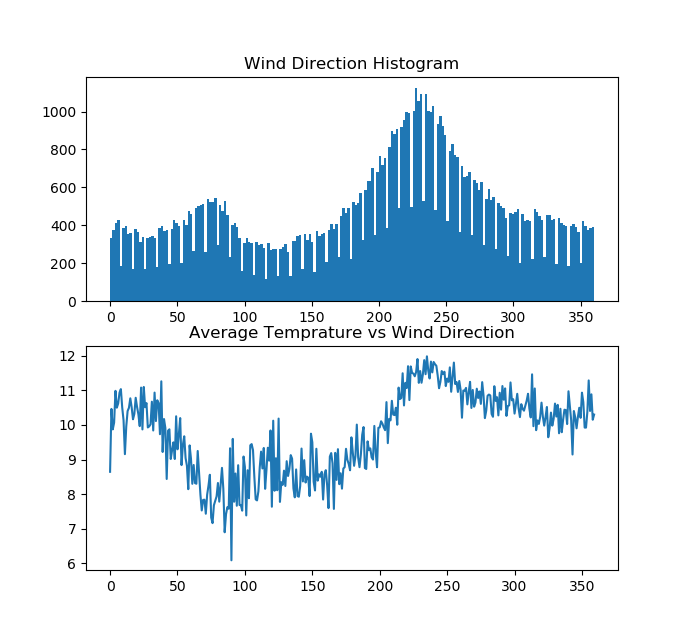

In [66]:
plt.subplot(211)
plt.title('Wind Direction Histogram')
plt.hist(wind_direction.compressed(), 200)
plt.subplot(212)
plt.title('Average Temprature vs Wind Direction')
plt.plot(np.arange(360), avg_of_avg_temp_by_wind)
plt.show()

In [99]:
wind_temp = pd.read_csv('data/KNMI.txt', header=0, usecols=(4,11), names=["wind speed", "avg temp"], converters={4: to_float, 11: to_float})

In [100]:
wind_temp.corr()

,wind speed,avg temp
wind speed,1.000000,-0.086291
avg temp,-0.086291,1.000000


## Differentiation (Derivative)



# Linear Algebra with Numpy

Linear algebra is using as the basis of any math in any machine learning algorithm.  

## Practical Example: Use Matrix calculation in Supervised Learning


![Matrix calc](img/LA-26.png)


### Iris dataset in Scikit-learn module:
scikit-learn comes with a few standard datasets, and iris is one of them.  
It is formatted in a way to be used by machine learning.   

In [4]:
from sklearn import datasets
iris_sk = datasets.load_iris()
print ('type of iris: ', type(iris_sk))
print ('dict keys: ' , iris_sk.keys())
print ('type of iris data: ', type(iris_sk.data))
print ('iris column names: ' , iris_sk.feature_names)
print ('the target: ', iris_sk.target)

type of iris:  <class 'sklearn.utils.Bunch'>
dict keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
type of iris data:  <class 'numpy.ndarray'>
iris column names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
the target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
import numpy as np

X = np.asmatrix(iris_sk.data)

x = np.transpose(X)

T = x.dot(X)

inv = np.linalg.inv(T)

theta = (inv.dot(X.T)).dot(iris_sk.target)

In [9]:
theta

matrix([[-0.0844926 , -0.02356211,  0.22487123,  0.59972247]])